# Systematic Literature Review: Sim-to-Real Transfer Analysis

This notebook presents a comprehensive analysis of the systematic literature review dataset examining sim-to-real transfer methodologies in robotics and machine learning. The analysis encompasses:

1. **Temporal Analysis**: Distribution of publications across years
2. **Geographic Analysis**: Publisher distribution by continent  
3. **Quality Assessment**: SJR ranking distribution analysis
4. **Conceptual Mapping**: Most frequent concept pairs and triples
5. **Cross-tabular Analysis**: Relationship between approaches and use cases
6. **Network Visualization**: Sankey diagram illustrating challenge-algorithm-approach relationships

**Methodology**: Multi-value fields are systematically processed through list expansion and frequency analysis to identify patterns and relationships within the sim-to-real transfer literature.

**Data Filtering**: The dataset is automatically filtered to include only studies marked as "included"="yes" to replicate thesis results and exclude studies not meeting inclusion criteria.

In [1]:
# Import required libraries for data analysis and visualization
import pandas as pd              # Data manipulation and analysis
import re                       # Regular expressions for string processing
from itertools import combinations  # Generate combinations for concept pair analysis
from collections import Counter     # Frequency counting utilities
import matplotlib.pyplot as plt     # Statistical data visualization
import numpy as np                  # Numerical computing
import country_converter as coco    # Geographic data standardization

In [2]:
# Load the systematic literature review dataset
# File contains coded data from reviewed publications with multi-value categorical fields
df = pd.read_excel('SLR_Analysis.xlsx')

# Filter dataset to include only studies marked as "included" = "yes"
# This ensures replication of thesis results by excluding studies not meeting inclusion criteria
print(f"Original dataset: {len(df)} studies")
df = df[df['Included'] == 'Yes'].copy()
print(f"Filtered dataset (included='yes'): {len(df)} studies")
print(f"Excluded studies: {len(pd.read_excel('SLR_Analysis.xlsx')) - len(df)} studies")

Original dataset: 108 studies
Filtered dataset (included='yes'): 44 studies
Excluded studies: 64 studies


In [3]:
# Data preprocessing: Convert multi-value string fields to lists
# Multi-value fields contain semicolon or ampersand-separated values that require splitting
# for proper frequency analysis and cross-tabulation

mv_cols = ['Challenges - Concept', 'Challenges - Subconcept', 'Simulator - Concept', 
           'Simulator - Subconcept', 'Learning Algorithm','Learning Algorithm - Concept',
            'Approaches', 'Use Case']

# Process each multi-value column:
# 1. Fill NaN values with empty strings to prevent processing errors
# 2. Split on semicolons and ampersands (common delimiters in coded data)
# 3. Strip whitespace to ensure clean category labels
# 4. Filter out empty strings resulting from consecutive delimiters
for col in mv_cols:
    df[col] = df[col].fillna('').apply(lambda x: [i.strip() for i in re.split(r'[;&]', x) if i.strip()])

# 2. Descriptive Analysis

This section provides frequency distributions for each coded dimension, offering insights into the most prevalent concepts across the literature corpus.

## 2.1 Frequency Distributions by Dimension

### 2.1.1 Challenges - Concept Level

Primary challenge categories identified in sim-to-real transfer research.

In [4]:
# Frequency analysis for challenge concepts
# This standardized approach is used across all categorical dimensions

selected_dim = 'Challenges - Concept'  

# Process multi-value field for frequency counting:
# 1. Explode list values into separate rows (one row per concept occurrence)
# 2. Count value frequencies using pandas value_counts()
# 3. Reset index to convert Series to DataFrame with proper column names
# 4. Add dimension identifier for result tracking
vc = (
    df[selected_dim]
    .explode()                           # Convert list elements to individual rows
    .value_counts()                      # Count frequency of each concept
    .reset_index(name='Count')           # Convert to DataFrame with Count column
    .rename(columns={'index': 'Value'})  # Rename index column to Value
)
vc.insert(0, 'Dimension', selected_dim)  # Add dimension identifier

# Display results sorted by frequency (descending)
vc

,Dimension,Challenges - Concept,Count
0,Challenges - Concept,Sensor Domain Discrepancies,33
1,Challenges - Concept,Physical Modeling Errors,27
2,Challenges - Concept,High Sample Costs,12
3,Challenges - Concept,Simulator-Specific Limitations,4
4,Challenges - Concept,Latency and Delay,3
5,Challenges - Concept,Hardware Constraints,1


### 2.1.2 Challenges - Subconcept Level

Detailed subcategories within the challenge dimension, providing granular insight into specific issues addressed in the literature.

In [5]:
# Frequency analysis for challenge subconcepts
selected_dim = 'Challenges - Subconcept'  

vc = (
    df[selected_dim]
    .explode()
    .value_counts()
    .reset_index(name='Count')
    .rename(columns={'index': 'Value'})
)
vc.insert(0, 'Dimension', selected_dim)

vc

,Dimension,Challenges - Subconcept,Count
0,Challenges - Subconcept,Visual Appearance Gap,25
1,Challenges - Subconcept,Dynamics Mismatch,18
2,Challenges - Subconcept,Noise – Bias - Calibration Issues,10
3,Challenges - Subconcept,Contact Modeling Issues,8
4,Challenges - Subconcept,Accuracy vs. Speed TradeOff,4


### 2.1.3 Simulator - Concept Level

High-level categorization of simulation environments and platforms utilized in sim-to-real research.

In [6]:
# Frequency analysis for simulator concepts
selected_dim = 'Simulator - Concept'  

vc = (
    df[selected_dim]
    .explode()
    .value_counts()
    .reset_index(name='Count')
    .rename(columns={'index': 'Value'})
)
vc.insert(0, 'Dimension', selected_dim)

vc

,Dimension,Simulator - Concept,Count
0,Simulator - Concept,Robotics Simulators,14
1,Simulator - Concept,Physics Engine,14
2,Simulator - Concept,Modeling and simulation,11
3,Simulator - Concept,Game Engine,5
4,Simulator - Concept,Other,3
5,Simulator - Concept,Network Simulation,1


### 2.1.4 Simulator - Subconcept Level

Specific simulation tools, engines, and platforms identified across the literature corpus.

In [7]:
# Frequency analysis for simulator subconcepts
selected_dim = 'Simulator - Subconcept'  

vc = (
    df[selected_dim]
    .explode()
    .value_counts()
    .reset_index(name='Count')
    .rename(columns={'index': 'Value'})
)
vc.insert(0, 'Dimension', selected_dim)

vc

,Dimension,Simulator - Subconcept,Count
0,Simulator - Subconcept,PyBullet,10
1,Simulator - Subconcept,CoppeliaSim,5
2,Simulator - Subconcept,MuJoCo,4
3,Simulator - Subconcept,Gazebo,4
4,Simulator - Subconcept,MATLAB/Simulink,3
5,Simulator - Subconcept,Unreal Engine,3
6,Simulator - Subconcept,NVIDIA Isaac Sim / Omniverse,2
7,Simulator - Subconcept,Isaac Gym,1
8,Simulator - Subconcept,NS-3,1
9,Simulator - Subconcept,OMNet+,1


### 2.1.5 Learning Algorithms

Machine learning and reinforcement learning algorithms employed in sim-to-real transfer methodologies.

In [8]:
# Frequency analysis for learning algorithms
selected_dim = 'Learning Algorithm'  

vc = (
    df[selected_dim]
    .explode()
    .value_counts()
    .reset_index(name='Count')
    .rename(columns={'index': 'Value'})
)
vc.insert(0, 'Dimension', selected_dim)

vc

,Dimension,Learning Algorithm,Count
0,Learning Algorithm,Reinforcement Learning,22
1,Learning Algorithm,Supervised Learning,18
2,Learning Algorithm,Unsupervised Learning,14
3,Learning Algorithm,Deep Learning,3
4,Learning Algorithm,Imitation Learning,3


### 2.1.6 Learning Algorithm - Concept Level

Conceptual categorization of learning methodologies (e.g., supervised, unsupervised, reinforcement learning).

In [9]:
# Frequency analysis for learning algorithm concepts
selected_dim = 'Learning Algorithm - Concept'  

vc = (
    df[selected_dim]
    .explode()
    .value_counts()
    .reset_index(name='Count')
    .rename(columns={'index': 'Value'})
)
vc.insert(0, 'Dimension', selected_dim)

vc

,Dimension,Learning Algorithm - Concept,Count
0,Learning Algorithm - Concept,Convolutional Neural Networks,16
1,Learning Algorithm - Concept,Generative Adversarial Networks,14
2,Learning Algorithm - Concept,Soft Actor Critic,8
3,Learning Algorithm - Concept,Proximal Policy Optimization,7
4,Learning Algorithm - Concept,Deep Q-Network,4
5,Learning Algorithm - Concept,Asynchronous Advantage Actor Critic,3
6,Learning Algorithm - Concept,Behavioral Cloning,2
7,Learning Algorithm - Concept,Custom Deep Neural Networks,2
8,Learning Algorithm - Concept,Autoencoder (AE) / Variational Autoencoder (VAE),1
9,Learning Algorithm - Concept,Teacher-Student Network,1


### 2.1.7 Approaches - Concept Level

Primary methodological approaches employed to address sim-to-real transfer challenges.

In [10]:
# Frequency analysis for methodological approaches
selected_dim = 'Approaches'  

vc = (
    df[selected_dim]
    .explode()
    .value_counts()
    .reset_index(name='Count')
    .rename(columns={'index': 'Value'})
)
vc.insert(0, 'Dimension', selected_dim)

vc

,Dimension,Approaches,Count
0,Approaches,Domain Randomization,17
1,Approaches,Representation Learning,17
2,Approaches,Hybrid Sim/Real Learning,16
3,Approaches,Domain Adaptation,15
4,Approaches,Transfer Learning,14
5,Approaches,System Identification,10
6,Approaches,Parameter Tuning,7
7,Approaches,Model-based Reinforcement Learning,4


### 2.1.8 Use Cases

Application domains and specific use cases where sim-to-real transfer methodologies are applied.

In [11]:
# Frequency analysis for application use cases
selected_dim = 'Use Case'  

vc = (
    df[selected_dim]
    .explode()
    .value_counts()
    .reset_index(name='Count')
    .rename(columns={'index': 'Value'})
)
vc.insert(0, 'Dimension', selected_dim)

vc

,Dimension,Use Case,Count
0,Use Case,Manipulation and Grasping,21
1,Use Case,Locomotion and Navigation,15
2,Use Case,Industrial and Production,8


## 2.2 Bibliometric Analysis

Temporal, geographic, and quality-based analysis of the literature corpus to understand publication patterns and research landscape characteristics.

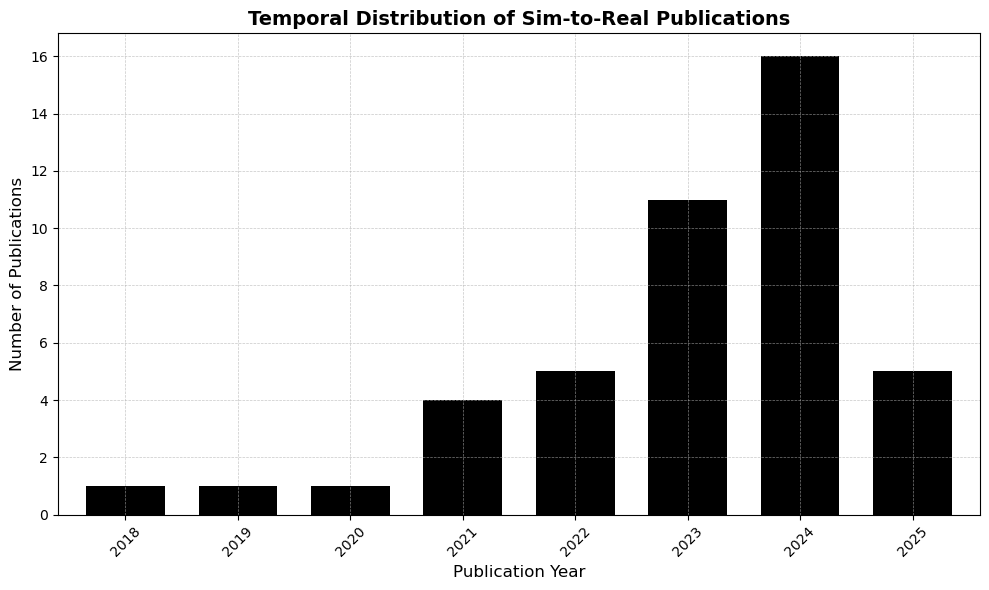

Total publications: 44
Year range: 2018 - 2025
Peak year: 2024 (16 publications)


In [12]:
# Temporal distribution analysis: Publications per year
# Reveals research activity trends and field development over time

year_counts = df['Publication Year'].value_counts().sort_index()

# Create visualization with academic styling
plt.figure(figsize=(10, 6))
ax = year_counts.plot(kind='bar', color='black', width=0.7)
ax.set_title('Temporal Distribution of Sim-to-Real Publications', fontsize=14, fontweight='bold')
ax.set_xlabel('Publication Year', fontsize=12)
ax.set_ylabel('Number of Publications', fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Improve readability
plt.xticks(rotation=45)
plt.tight_layout()

# Add alt text for HTML export
ax.figure._suptitle = "Bar chart showing temporal distribution of sim-to-real publications by year"
plt.show()

# Display summary statistics
print(f"Total publications: {len(df)}")
print(f"Year range: {year_counts.index.min()} - {year_counts.index.max()}")
print(f"Peak year: {year_counts.idxmax()} ({year_counts.max()} publications)")

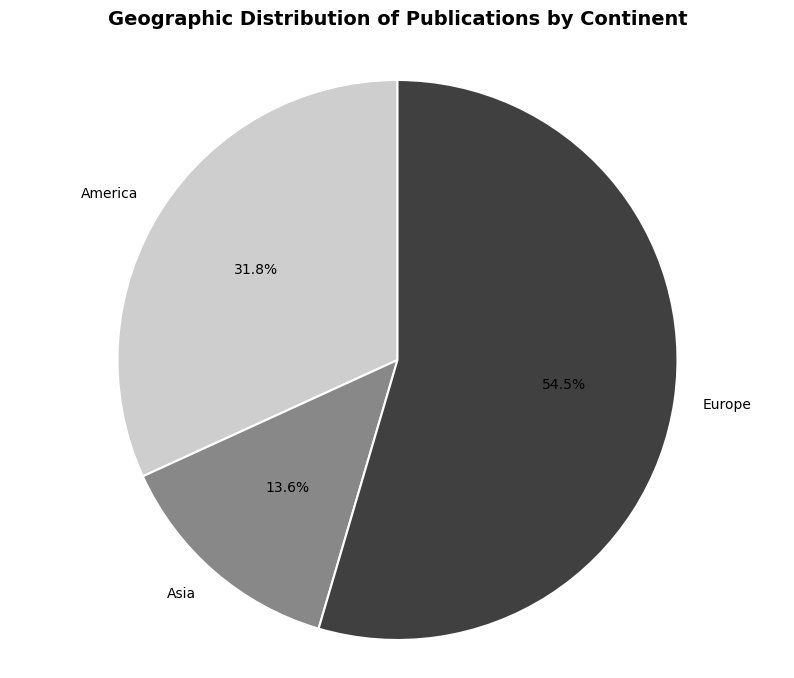

Continental distribution:
America: 14 publications (31.8%)
Asia: 6 publications (13.6%)
Europe: 24 publications (54.5%)


In [13]:
# Geographic distribution analysis: Publications by continent
# Reveals regional research activity and potential geographic biases in the literature

# Convert country names to continent classifications using standardized mapping
cc = coco.CountryConverter()
df['Continent'] = cc.convert(names=df['Country'], to='continent')
continent_counts = df['Continent'].value_counts().sort_index()

# Generate grayscale color palette for academic publication standards
grays = plt.cm.Greys(np.linspace(0.3, 0.8, len(continent_counts)))

# Create pie chart visualization
plt.figure(figsize=(10, 8))
ax = continent_counts.plot(
    kind='pie',
    colors=grays,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor':'white', 'linewidth': 1.5}
)
ax.set_ylabel('')  # Remove default ylabel
ax.set_title('Geographic Distribution of Publications by Continent', 
             fontsize=14, fontweight='bold', pad=20)
ax.axis('equal')  # Ensure circular pie chart

# Add alt text for HTML export
ax.figure._suptitle = "Pie chart showing geographic distribution of publications by continent with percentages"
#plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Display detailed statistics
print("Continental distribution:")
for continent, count in continent_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{continent}: {count} publications ({percentage:.1f}%)")

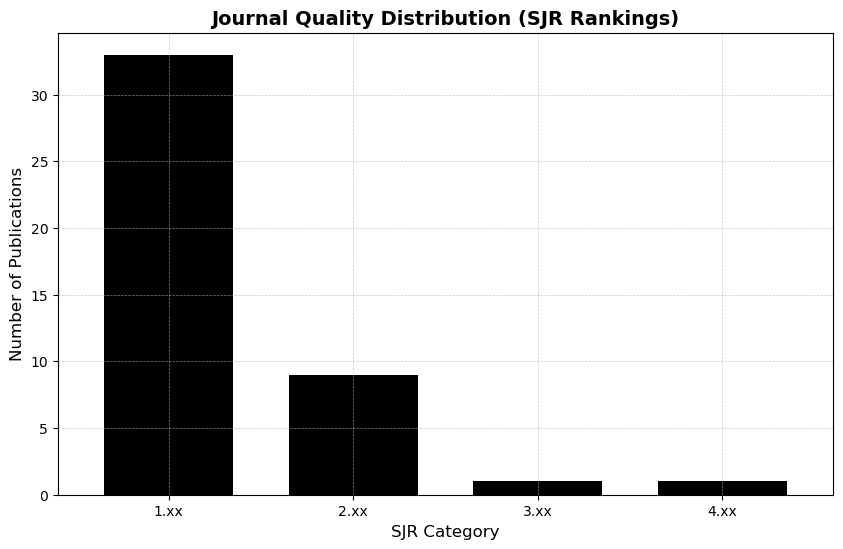

SJR Distribution Summary:
Total publications with SJR data: 44
Mean SJR: 1.76
Median SJR: 1.62
Range: 1.01 - 4.89


In [14]:
# Parse SJR values to float
sjr_processed = (
    df["SJR Ranking"]
    .astype(str)
    .str.replace(",", ".")
    .str.extract(r"(\d+\.\d+)")[0]
    .astype(float)
    .dropna()
)

# Coarse SJR bands (1.xx, 2.xx, 3.xx, 4.xx)
sjr_categories = pd.cut(
    sjr_processed,
    bins=[1, 2, 3, 4, 5],
    right=False,
    labels=["1.xx", "2.xx", "3.xx", "4.xx"]
)

category_counts = sjr_categories.value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = category_counts.plot(kind="bar", color="black", width=0.7)
ax.set_title("Journal Quality Distribution (SJR Rankings)", fontsize=14, fontweight='bold')
ax.set_xlabel("SJR Category", fontsize=12)
ax.set_ylabel("Number of Publications", fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.figure._suptitle = "Bar chart showing journal quality distribution across SJR bands"
plt.xticks(rotation=0)
plt.show()

print("SJR Distribution Summary:")
print(f"Total publications with SJR data: {len(sjr_processed)}")
print(f"Mean SJR: {sjr_processed.mean():.2f}")
print(f"Median SJR: {sjr_processed.median():.2f}")
print(f"Range: {sjr_processed.min():.2f} - {sjr_processed.max():.2f}")



# 3. Relational Analysis

This section examines relationships between different conceptual dimensions through combinatorial analysis and cross-tabulation, revealing patterns in how different concepts co-occur within individual studies.

## 3.1 Multi-Dimensional Concept Combinations

Analysis of the most frequent concept pairs and triples across different dimensions, revealing common methodological patterns and research focuses in the sim-to-real literature.

In [15]:
# Multi-dimensional concept combination analysis
# Identifies most frequent concept pairs and triples across different dimensions
# Reveals common methodological patterns and research configurations

from itertools import combinations
import pandas as pd

# Configure pandas display for better output formatting
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Identify multi-value columns for combination analysis
mv_cols = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, list)).all()]

# Initialize containers for combination data
all_pairs = []
all_triples = []

# Process each study (row) to extract concept combinations
for _, row in df.iterrows():
    # Collect all concept entries with their dimension information
    # Format: [(concept_value, column_name), ...]
    entries = [(v, col) for col in mv_cols for v in row[col] if v]

    # Generate concept pairs
    for (v1, c1), (v2, c2) in combinations(entries, 2):
        # Extract dimension names (remove subconcept indicators)
        dim1 = c1.split(' - ')[0]
        dim2 = c2.split(' - ')[0]
        
        # Skip combinations within same dimension but different levels
        # (e.g., "Challenges - Concept" + "Challenges - Subconcept")
        if dim1 == dim2 and c1 != c2:
            continue
            
        all_pairs.append((f"{dim1} x {dim2}", v1, v2))

    # Generate concept triples
    for (v1, c1), (v2, c2), (v3, c3) in combinations(entries, 3):
        dims = [c1.split(' - ')[0], c2.split(' - ')[0], c3.split(' - ')[0]]
        cols = [c1, c2, c3]
        
        # Skip if any dimension appears twice with different specificity levels
        if any(dims[i] == dims[j] and cols[i] != cols[j] 
               for i, j in combinations(range(3), 2)):
            continue
            
        all_triples.append((f"{dims[0]} x {dims[1]} x {dims[2]}", v1, v2, v3))

# Create structured DataFrames for analysis
pairs_df = pd.DataFrame(all_pairs, columns=['Dimensions', 'First', 'Second'])
triples_df = pd.DataFrame(all_triples, columns=['Dimensions', 'First', 'Second', 'Third'])

# Analyze top 10 most frequent pairs
pairs_counts = (
    pairs_df
    .value_counts(['Dimensions', 'First', 'Second'])
    .reset_index(name='Count')
    .assign(Combination=lambda d: d['First'] + ' & ' + d['Second'])
    [['Dimensions', 'Combination', 'Count']]
    .head(10)
)

# Analyze top 10 most frequent triples
triples_counts = (
    triples_df
    .value_counts(['Dimensions', 'First', 'Second', 'Third'])
    .reset_index(name='Count')
    .assign(Combination=lambda d: d['First'] + ' & ' + d['Second'] + ' & ' + d['Third'])
    [['Dimensions', 'Combination', 'Count']]
    .head(10)
)

# Display results
print("Top 10 Most Frequent Concept Pairs:")
print("=" * 50)
print(pairs_counts.to_string(index=False))

print("\n\nTop 10 Most Frequent Concept Triples:")
print("=" * 50)
print(triples_counts.to_string(index=False))

Top 10 Most Frequent Concept Pairs:
                     Dimensions                                                 Combination  Count
Challenges x Learning Algorithm           Physical Modeling Errors & Reinforcement Learning     20
          Challenges x Use Case     Sensor Domain Discrepancies & Manipulation and Grasping     19
        Challenges x Approaches       Sensor Domain Discrepancies & Representation Learning     17
Challenges x Learning Algorithm           Sensor Domain Discrepancies & Supervised Learning     17
Challenges x Learning Algorithm        Sensor Domain Discrepancies & Reinforcement Learning     17
Challenges x Learning Algorithm Sensor Domain Discrepancies & Convolutional Neural Networks     16
          Challenges x Use Case           Visual Appearance Gap & Manipulation and Grasping     16
        Challenges x Approaches          Sensor Domain Discrepancies & Domain Randomization     15
        Challenges x Approaches             Sensor Domain Discrepancies &

## 3.2 Challenge-Approach Correspondence Analysis

Examination of how specific challenges correlate with adopted approaches, providing insights into problem-solution patterns in sim-to-real research.

In [16]:
# Challenge-Approach Correspondence Analysis
# Analyzes which approaches are most commonly used to address specific challenges
# Provides insights into problem-solution patterns in sim-to-real research

from itertools import combinations
import pandas as pd

# Define target dimensions for analysis
dim_challenge = "Challenges"
dim_approach = "Approaches"

# Identify multi-value columns
mv_cols = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, list)).all()]

# Build challenge-to-approaches mapping
# Structure: {challenge: [set_of_approaches_per_study, ...]}
challenge_to_approaches = {}

for _, row in df.iterrows():
    # Extract all concept entries with dimension information
    entries = [(v, col) for col in mv_cols for v in row[col] if v]
    
    # Separate challenges and approaches for this study
    challenges = [v for v, c in entries if c.startswith(dim_challenge)]
    approaches = [v for v, c in entries if c.startswith(dim_approach)]
    
    # Map each challenge to the set of approaches used in this study
    for ch in challenges:
        challenge_to_approaches.setdefault(ch, []).append(set(approaches))

# Analysis 1: Most common single approach per challenge
def get_most_common_single(challenge_dict):
    """Identify the single most frequently used approach for each challenge."""
    results = []
    
    for ch, app_lists in challenge_dict.items():
        # Flatten all approaches across studies addressing this challenge
        all_approaches = [a for lst in app_lists for a in lst]
        total_studies = len(app_lists)
        
        if total_studies == 0 or not all_approaches:
            continue
            
        # Count approach frequencies
        counts = pd.Series(all_approaches).value_counts()
        top_approach = counts.index[0]
        count = counts.iloc[0]
        percentage = (count / total_studies) * 100
        
        results.append((ch, top_approach, count, total_studies, round(percentage, 1)))
    
    return pd.DataFrame(results, 
                       columns=['Challenge', 'Most Common Approach', 'Count', 'Total Studies', 'Percentage']) \
             .sort_values(by='Total Studies', ascending=False)

# Analysis 2: Most common approach pair (summed frequencies)
def get_summed_pairs(challenge_dict):
    """Find the approach pair with highest combined frequency for each challenge."""
    results = []
    
    for ch, app_lists in challenge_dict.items():
        total_studies = len(app_lists)
        if total_studies == 0:
            continue
            
        # Count individual approach frequencies
        all_approaches = [a for lst in app_lists for a in lst]
        counts = pd.Series(all_approaches).value_counts()

        if len(counts) < 2:
            continue  # Need at least 2 approaches for pairs

        # Calculate summed counts for all possible pairs
        pair_sums = []
        for a1, a2 in combinations(counts.index, 2):
            pair_label = f"{a1} & {a2}"
            summed_count = counts[a1] + counts[a2]
            percentage = (summed_count / total_studies) * 100
            pair_sums.append((ch, pair_label, summed_count, total_studies, round(percentage, 1)))

        # Select the pair with highest combined frequency
        if pair_sums:
            best_pair = max(pair_sums, key=lambda x: x[2])
            results.append(best_pair)

    return pd.DataFrame(results, 
                       columns=['Challenge', 'Most Common Approach Pair', 'Combined Count', 'Total Studies', 'Combined Percentage']) \
             .sort_values(by='Total Studies', ascending=False)

# Execute analyses
df_single = get_most_common_single(challenge_to_approaches)
df_pairs = get_summed_pairs(challenge_to_approaches)

# Display results
print("Challenge → Most Frequently Used Single Approach")
print("=" * 60)
print(df_single.to_string(index=False))

print("\n\nChallenge → Most Common Approach Pair (Combined Frequency)")
print("=" * 60)
print(df_pairs.to_string(index=False))

# Summary statistics
print(f"\n\nSummary:")
print(f"Challenges analyzed: {len(challenge_to_approaches)}")
print(f"Average approaches per challenge: {sum(len(set().union(*apps)) for apps in challenge_to_approaches.values()) / len(challenge_to_approaches):.1f}")
total_challenge_instances = sum(len(apps) for apps in challenge_to_approaches.values())
print(f"Total challenge instances across all studies: {total_challenge_instances}")

Challenge → Most Frequently Used Single Approach
                        Challenge     Most Common Approach  Count  Total Studies  Percentage
      Sensor Domain Discrepancies  Representation Learning     17             33        51.5
         Physical Modeling Errors     Domain Randomization     13             27        48.1
            Visual Appearance Gap  Representation Learning     15             25        60.0
                Dynamics Mismatch Hybrid Sim/Real Learning      9             18        50.0
                High Sample Costs        Transfer Learning      6             12        50.0
Noise – Bias - Calibration Issues  Representation Learning      6             10        60.0
          Contact Modeling Issues  Representation Learning      4              8        50.0
   Simulator-Specific Limitations    System Identification      3              4        75.0
      Accuracy vs. Speed TradeOff    System Identification      3              4        75.0
                Laten

## 3.3 Cross-Tabulation Analysis: Approaches vs. Use Cases

Contingency table analysis examining the relationship between methodological approaches and application domains.

In [17]:
# Cross-tabulation: Approaches vs Use Cases
# Creates a contingency table showing co-occurrence frequencies
# Reveals which approaches are preferred for specific application domains

# Explode multi-value fields to create one row per approach-use case combination
df_approaches_usecases = df[['Approaches', 'Use Case']].explode('Approaches').explode('Use Case')

# Generate contingency table
matrix = pd.crosstab(df_approaches_usecases['Approaches'], 
                    df_approaches_usecases['Use Case'], 
                    margins=True)  # Include row and column totals

print("Approaches vs Use Cases Contingency Table:")
print("=" * 50)
print(matrix)

# Additional analysis: identify strongest associations
print(f"\n\nMatrix Dimensions: {matrix.shape[0]-1} approaches × {matrix.shape[1]-1} use cases")
print(f"Total approach-use case combinations: {matrix.loc['All', 'All']}")

# Find most common combinations (excluding totals)
matrix_no_totals = matrix.iloc[:-1, :-1]
if not matrix_no_totals.empty:
    max_combination = matrix_no_totals.stack().idxmax()
    max_value = matrix_no_totals.stack().max()
    print(f"Most frequent combination: {max_combination[0]} + {max_combination[1]} ({max_value} occurrences)")

matrix

Approaches vs Use Cases Contingency Table:
Use Case                            Industrial and Production  Locomotion and Navigation  Manipulation and Grasping  All
Approaches                                                                                                              
Domain Adaptation                                           2                          4                          9   15
Domain Randomization                                        3                          8                          6   17
Hybrid Sim/Real Learning                                    2                          6                          8   16
Model-based Reinforcement Learning                          2                          2                          0    4
Parameter Tuning                                            1                          4                          2    7
Representation Learning                                     3                          3                      

Use Case,Industrial and Production,Locomotion and Navigation,Manipulation and Grasping,All
Approaches,,,,
Domain Adaptation,2,4,9,15
Domain Randomization,3,8,6,17
Hybrid Sim/Real Learning,2,6,8,16
Model-based Reinforcement Learning,2,2,0,4
Parameter Tuning,1,4,2,7
Representation Learning,3,3,11,17
System Identification,2,5,3,10
Transfer Learning,3,2,9,14
All,18,34,48,100


## 3.4 Cross-Tabulation Analysis: Learning Algorithms vs. Simulators

Filtered contingency table analysis examining relationships between learning algorithms and simulation platforms, focusing on combinations with sufficient frequency (>2 occurrences) to ensure statistical relevance.

In [18]:
# Cross-tabulation: Learning Algorithms vs Simulators (Filtered)
# Analyzes relationships between learning algorithms and simulation platforms
# Applies frequency filtering to focus on statistically relevant combinations

# Explode multi-value fields for analysis
df_algorithms_simulators = (
    df[['Learning Algorithm - Concept', 'Simulator - Subconcept']]
    .explode('Learning Algorithm - Concept')
    .explode('Simulator - Subconcept')
)

# Calculate frequency distributions
alg_counts = df_algorithms_simulators['Learning Algorithm - Concept'].value_counts()
sim_counts = df_algorithms_simulators['Simulator - Subconcept'].value_counts()

# Apply frequency thresholds to reduce noise and focus on meaningful patterns
# Threshold rationale: >2 occurrences ensures sufficient sample size for analysis
min_algorithm_freq = 2
min_simulator_freq = 2

valid_algorithms = alg_counts[alg_counts > min_algorithm_freq].index
valid_simulators = sim_counts[sim_counts > min_simulator_freq].index

print(f"Frequency filtering applied:")
print(f"- Algorithms: {len(valid_algorithms)}/{len(alg_counts)} retained (>{min_algorithm_freq} occurrences)")
print(f"- Simulators: {len(valid_simulators)}/{len(sim_counts)} retained (>{min_simulator_freq} occurrences)")

# Filter data to include only frequently occurring algorithms and simulators
df_filtered = df_algorithms_simulators[
    df_algorithms_simulators['Learning Algorithm - Concept'].isin(valid_algorithms) &
    df_algorithms_simulators['Simulator - Subconcept'].isin(valid_simulators)
]

# Generate filtered contingency table
matrix = pd.crosstab(
    df_filtered['Learning Algorithm - Concept'],
    df_filtered['Simulator - Subconcept'],
    margins=True
)

print(f"\nFiltered dataset: {len(df_filtered)} algorithm-simulator combinations")
print("\nLearning Algorithms vs Simulators Contingency Table (Filtered):")
print("=" * 60)

# Display matrix with improved formatting
matrix_display = matrix.copy()
print(matrix_display)

# Identify key patterns
if matrix.shape[0] > 1 and matrix.shape[1] > 1:
    matrix_no_totals = matrix.iloc[:-1, :-1]
    if not matrix_no_totals.empty and matrix_no_totals.sum().sum() > 0:
        max_combination = matrix_no_totals.stack().idxmax()
        max_value = matrix_no_totals.stack().max()
        print(f"\nMost frequent algorithm-simulator combination:")
        print(f"{max_combination[0]} + {max_combination[1]} ({max_value} occurrences)")
    
    # Show algorithms and simulators with highest total usage
    alg_totals = matrix.iloc[:-1, -1].sort_values(ascending=False)
    sim_totals = matrix.iloc[-1, :-1].sort_values(ascending=False)
    
    print(f"\nMost frequently used algorithms:")
    for i, (alg, count) in enumerate(alg_totals.head(3).items(), 1):
        print(f"{i}. {alg}: {count} combinations")
    
    print(f"\nMost frequently used simulators:")
    for i, (sim, count) in enumerate(sim_totals.head(3).items(), 1):
        print(f"{i}. {sim}: {count} combinations")

matrix

Frequency filtering applied:
- Algorithms: 7/16 retained (>2 occurrences)
- Simulators: 9/28 retained (>2 occurrences)

Filtered dataset: 37 algorithm-simulator combinations

Learning Algorithms vs Simulators Contingency Table (Filtered):
Simulator - Subconcept               Box2D  CoppeliaSim  Custom Video Diffusion  Gazebo  MATLAB/Simulink  MuJoCo  PhysX  PyBullet  Unreal Engine  All
Learning Algorithm - Concept                                                                                                                         
Asynchronous Advantage Actor Critic      1            0                       0       1                0       0      1         0              0    3
Convolutional Neural Networks            0            1                       1       1                1       1      0         6              0   11
Deep Q-Network                           1            2                       0       0                0       0      0         0              1    4
Generative 

Simulator - Subconcept,Box2D,CoppeliaSim,Custom Video Diffusion,Gazebo,MATLAB/Simulink,MuJoCo,PhysX,PyBullet,Unreal Engine,All
Learning Algorithm - Concept,,,,,,,,,,
Asynchronous Advantage Actor Critic,1,0,0,1,0,0,1,0,0,3
Convolutional Neural Networks,0,1,1,1,1,1,0,6,0,11
Deep Q-Network,1,2,0,0,0,0,0,0,1,4
Generative Adversarial Networks,0,1,1,0,0,1,1,5,1,10
Proximal Policy Optimization,0,0,0,0,0,0,0,2,0,2
Soft Actor Critic,1,1,0,0,0,2,1,1,1,7
All,3,5,2,2,1,4,3,14,3,37


## 3.5 Network Visualization: Sankey Flow Diagram

Interactive flow diagram illustrating the relationships between challenges, learning algorithms, and approaches. This visualization reveals the most common pathways from problem identification through methodological solution selection in sim-to-real transfer research.

Data preprocessing complete:
- Original studies: 44
- Exploded combinations: 298

Frequency filtering applied:
- Algorithms: 6/16 retained (≥3 in ORIGINAL df)
- Approaches: 8/8 retained (≥3 in exploded data)
- Final combinations for visualization: 237

Network structure:
- Challenge → Algorithm links: 21
- Algorithm → Approach links: 35


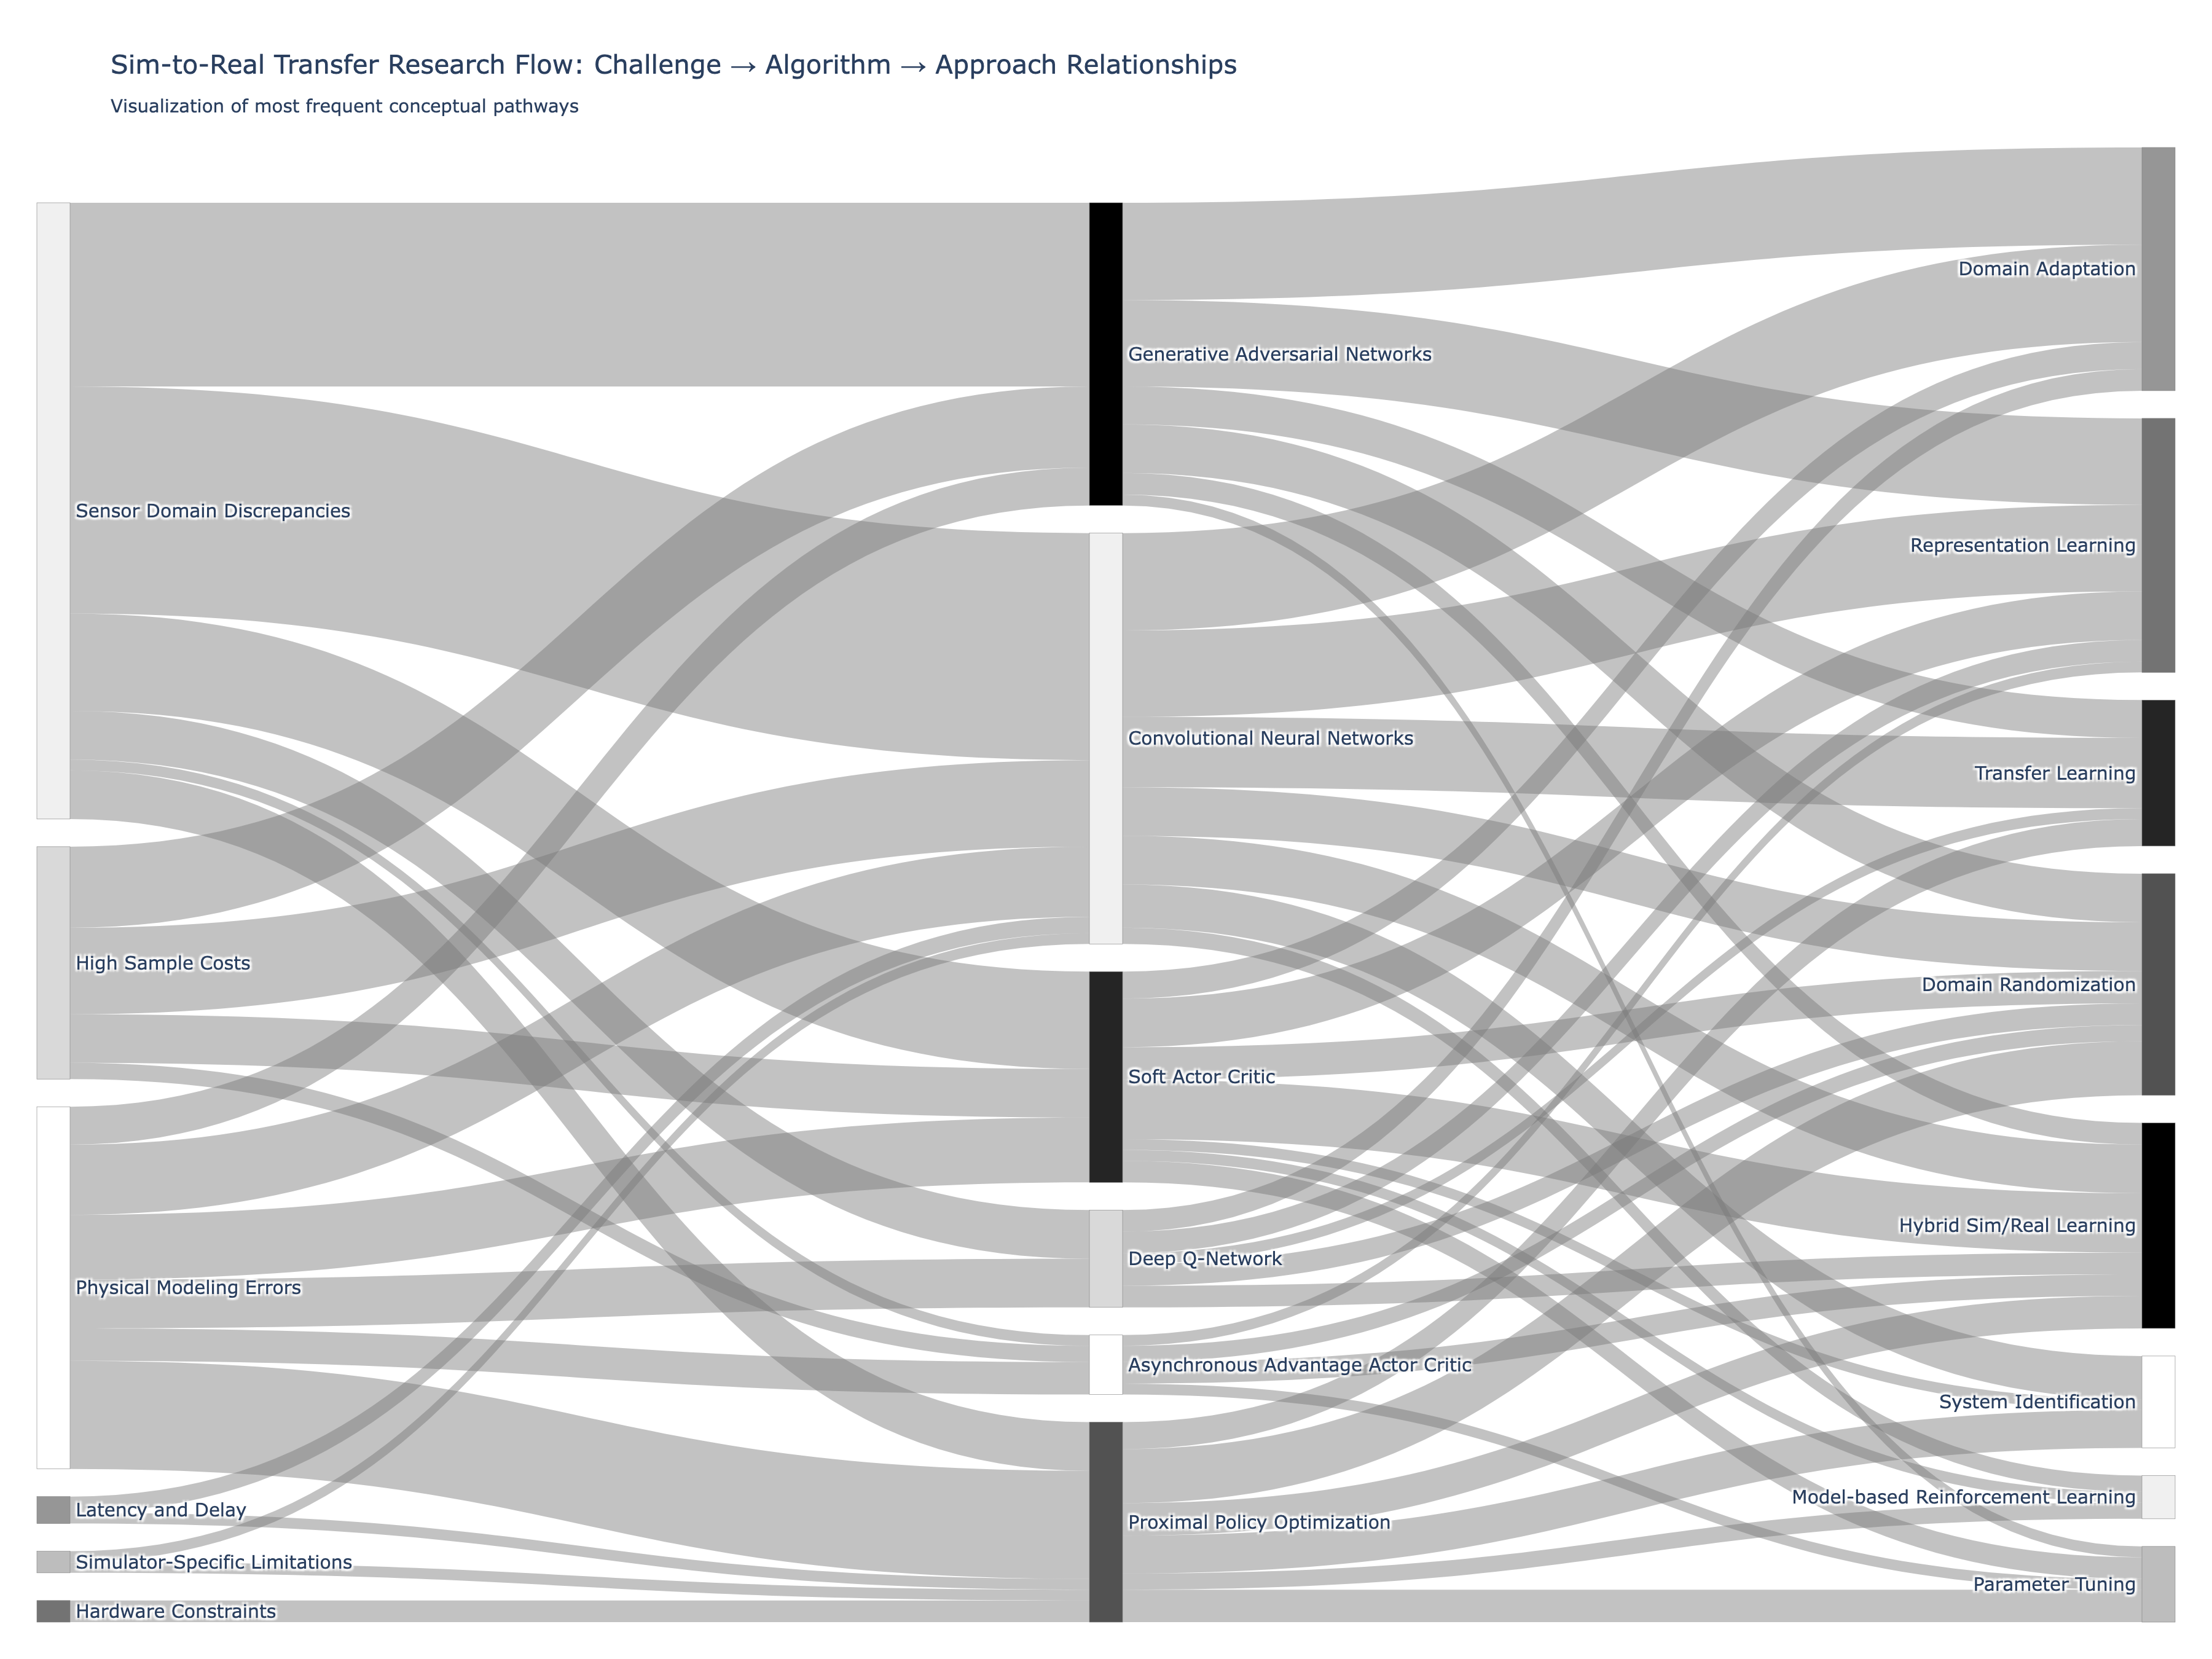

In [21]:
# Sankey Flow Diagram: Challenge → Algorithm → Approach Relationships
# Creates an interactive flow visualization showing the most common pathways
# from problem identification through algorithmic choice to methodological approach

import re, pandas as pd, plotly.graph_objects as go
from plotly.colors import sequential
import plotly.io as pio

# Define the three-stage analytical framework
COL_CHALLENGE = "Challenges - Concept"          # Stage 1: Problem identification
COL_ALG       = "Learning Algorithm - Concept"  # Stage 2: Algorithmic approach
COL_APPROACH  = "Approaches"                    # Stage 3: Methodological solution

# ============================================================================
# Data Preprocessing and Filtering
# ============================================================================

# Explode multi-value fields to create one row per concept combination
df_exploded = (
    df[[COL_CHALLENGE, COL_ALG, COL_APPROACH]]
      .explode(COL_CHALLENGE)
      .explode(COL_ALG)
      .explode(COL_APPROACH)
      .dropna(how="any")  # Remove rows with missing values in any column
)

print(f"Data preprocessing complete:")
print(f"- Original studies: {len(df)}")
print(f"- Exploded combinations: {len(df_exploded)}")

# --- Frequency analysis for learning algorithm concepts (based on ORIGINAL df) ---
selected_dim = COL_ALG

# vc built exactly in your style, but robust to pandas versions:
vc = (
    df[selected_dim]
      .explode()
      .value_counts()
      .rename("Count")            # name the series of counts
      .rename_axis("Value")       # name the index to become a column after reset_index
      .reset_index()
)
vc.insert(0, "Dimension", selected_dim)

# Apply frequency filtering:
# - Algorithms must appear at least 3 times in the ORIGINAL file (vc)
# - Approaches are filtered on the exploded combinations as before
min_algorithm_freq = 3      # Keep algorithms with ≥3 occurrences in ORIGINAL df
min_approach_freq  = 3      # Keep approaches with ≥3 occurrences in exploded combos

valid_algorithms = set(vc.loc[vc["Count"] >= min_algorithm_freq, "Value"])

approach_counts  = df_exploded[COL_APPROACH].value_counts()
valid_approaches = set(approach_counts[approach_counts >= min_approach_freq].index)

print(f"\nFrequency filtering applied:")
print(f"- Algorithms: {len(valid_algorithms)}/{len(vc)} retained (≥{min_algorithm_freq} in ORIGINAL df)")
print(f"- Approaches: {len(valid_approaches)}/{len(approach_counts)} retained (≥{min_approach_freq} in exploded data)")

# Filter dataset to include only frequent concepts (algorithms filtered by ORIGINAL counts)
df_sankey = df_exploded[
    df_exploded[COL_ALG].isin(valid_algorithms) &
    df_exploded[COL_APPROACH].isin(valid_approaches)
]

print(f"- Final combinations for visualization: {len(df_sankey)}")

# ============================================================================
# Network Link Construction
# ============================================================================

# Build link tables for the two transition stages
links_challenge_algorithm = (
    df_sankey.groupby([COL_CHALLENGE, COL_ALG], sort=False)
             .size().reset_index(name="value")
             .rename(columns={COL_CHALLENGE:"source", COL_ALG:"target"})
)

links_algorithm_approach = (
    df_sankey.groupby([COL_ALG, COL_APPROACH], sort=False)
             .size().reset_index(name="value")
             .rename(columns={COL_ALG:"source", COL_APPROACH:"target"})
)

print(f"\nNetwork structure:")
print(f"- Challenge → Algorithm links: {len(links_challenge_algorithm)}")
print(f"- Algorithm → Approach links: {len(links_algorithm_approach)}")

# ============================================================================
# Node and Color Configuration
# ============================================================================

# Create comprehensive node list maintaining hierarchical order
all_nodes = pd.Series(
    pd.concat([
        links_challenge_algorithm["source"], 
        links_challenge_algorithm["target"], 
        links_algorithm_approach["target"]
    ]).unique()
)

# Create node ID mapping for Plotly
node_id_map = {name: i for i, name in enumerate(all_nodes)}

def convert_links_to_ids(df_links):
    """Convert link DataFrames from names to node IDs."""
    return (
        df_links["source"].map(node_id_map).tolist(),
        df_links["target"].map(node_id_map).tolist(),
        df_links["value"].tolist()
    )

# Convert link data to ID format
src_ca, tgt_ca, val_ca = convert_links_to_ids(links_challenge_algorithm)
src_ap, tgt_ap, val_ap = convert_links_to_ids(links_algorithm_approach)

# ============================================================================
# Visual Styling Configuration
# ============================================================================

# Apply uniform grayscale palette for academic publication standards
grey_palette = sequential.Greys
node_colors = [grey_palette[i % len(grey_palette)] for i in range(len(all_nodes))]

# Configure semi-transparent link styling
link_color = "rgba(120,120,120,0.45)"

# Combine all links for visualization
all_links = {
    'source': src_ca + src_ap,
    'target': tgt_ca + tgt_ap,
    'value':  val_ca + val_ap,
    'color': [link_color] * (len(val_ca) + len(val_ap))
}

# ============================================================================
# Diagram Generation and Export
# ============================================================================

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    arrangement="snap",  # Optimize node positioning
    node=dict(
        label=all_nodes.tolist(),
        pad=15,              # Node spacing
        thickness=18,        # Node width
        color=node_colors,
        line=dict(color="grey", width=0.2)  # Node borders
    ),
    link=all_links
))

# Configure layout for academic presentation
fig.update_layout(
    title_text=(f"Sim-to-Real Transfer Research Flow: "
                f"Challenge → Algorithm → Approach Relationships<br>"
                f"<sub>Visualization of most frequent conceptual pathways</sub>"),
    font=dict(size=10),
    width=1200, 
    height=900, 
    margin=dict(l=20, r=20, t=80, b=20)
)

# Export static image for publication and HTML compatibility
try:
    fig.write_image("./img/sankey_sim2real.png", scale=3, width=1200, height=900)    
    # Display static image for HTML export compatibility (avoids Plotly warnings)
    from IPython.display import Image, display
    display(Image("./img/sankey_sim2real.png"))
    
except Exception as e:
    print(f"Note: Image export/display failed: {e}")
    print("Sankey diagram data generated successfully (see analysis summary below)")